In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import missingno
from mlxtend.preprocessing import minmax_scaling
from wordcloud import WordCloud



wine_df=pd.read_csv('wine.csv')
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


<AxesSubplot: >

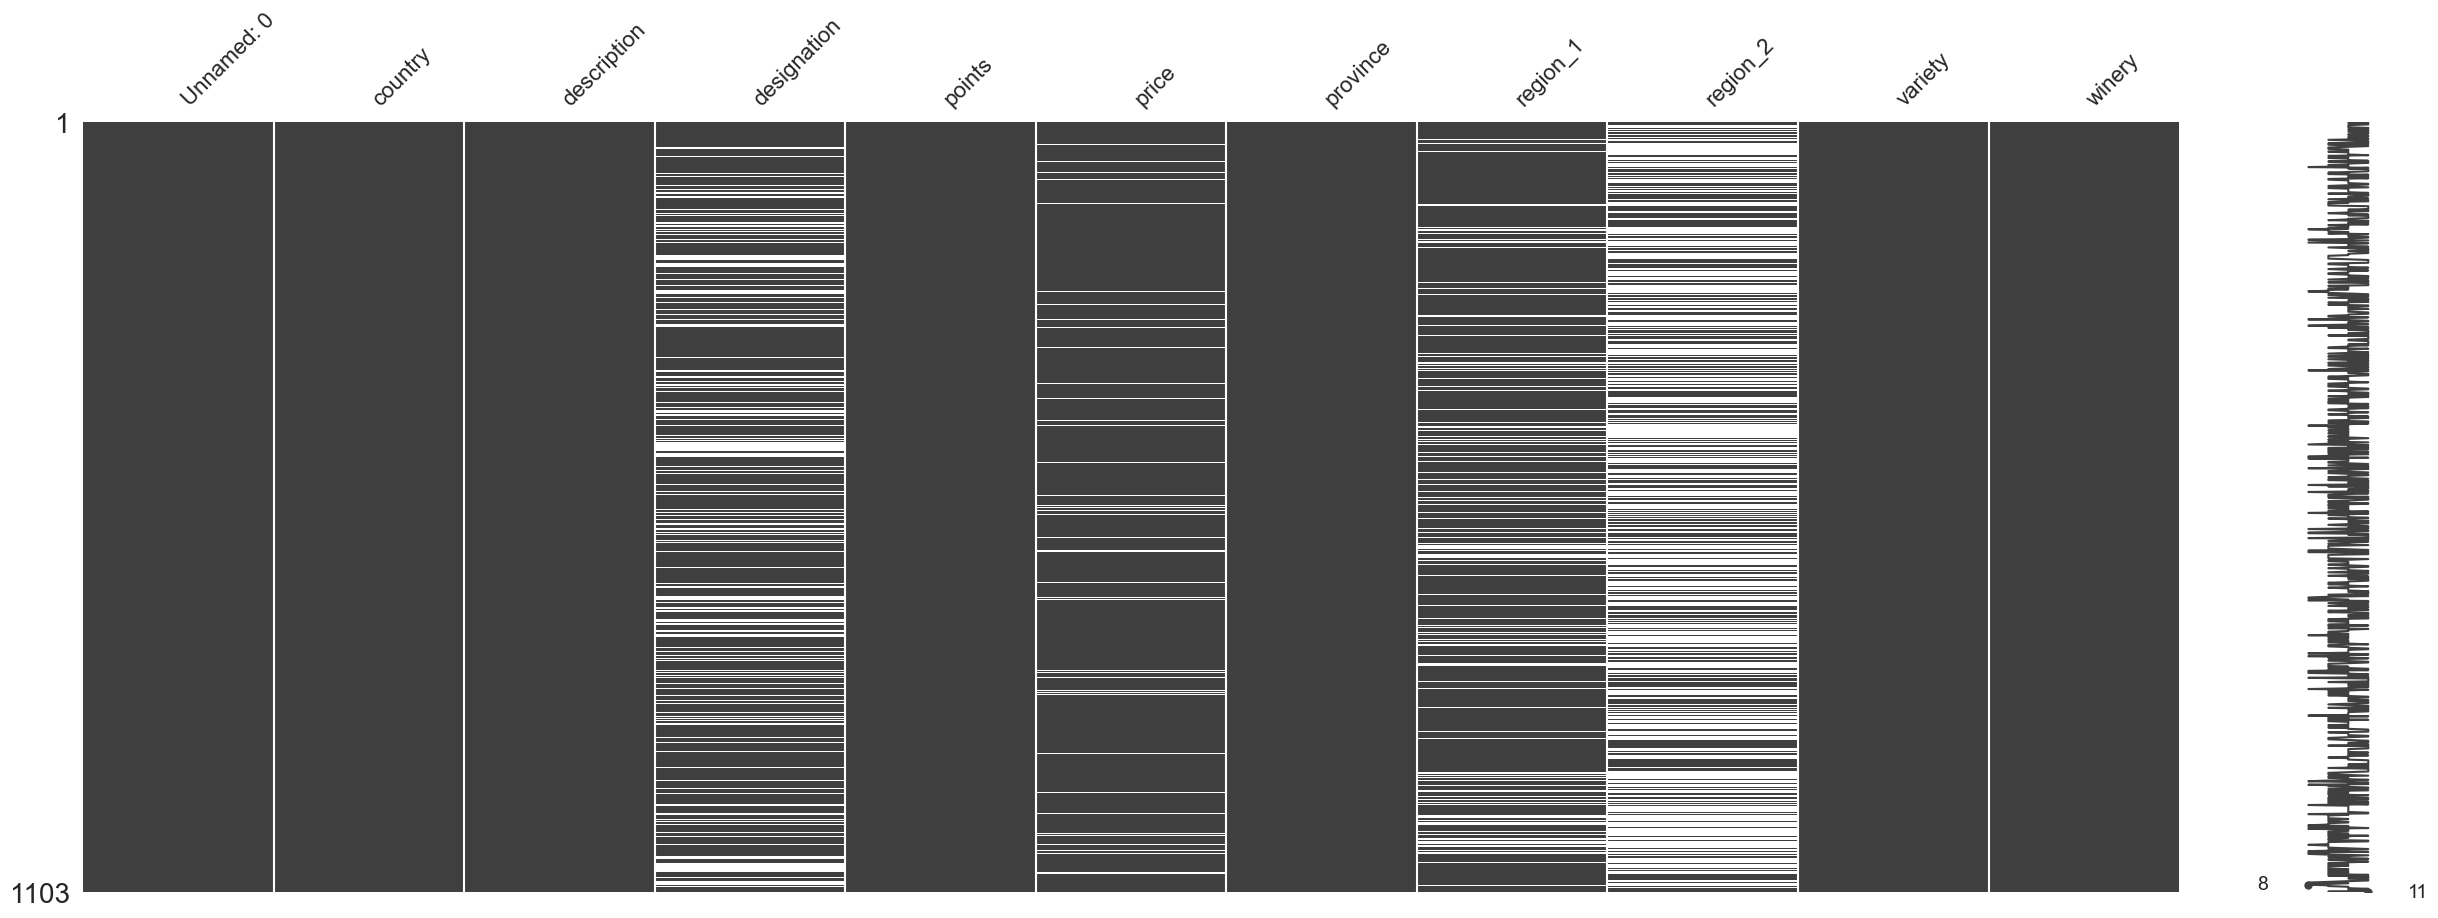

In [26]:
missingno.matrix(wine_df, figsize = (30,10))

Columns 'desingnation','price',region_1', and 'region_2' have missing data.


We can impute the missing data in the region columns by using the values in the province column. Missing values in region 2 will be named after provice and missing values in region 1 will be named after region 2.

In [27]:
wine_df['region_2']=wine_df['region_2'].fillna(wine_df['province'])
wine_df['region_1']=wine_df['region_1'].fillna(wine_df['region_2'])



Price can not be assumed from other data so missing values are removed.

In [28]:
wine_df=wine_df.dropna(subset=['price'])
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,Provence,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,Bordeaux,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


The missing data in the designation cannot be determed by other data in the dataset. As it is not relivant, the column will be removed. Description is also irrelivant and will be removed

In [29]:
wine_df=wine_df.drop(['designation','description'],axis=1)
wine_df

,Unnamed: 0,country,points,price,province,region_1,region_2,variety,winery
0,0,US,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,96,110.0,Northern Spain,Toro,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,95,66.0,Provence,Bandol,Provence,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...
1098,1098,US,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,87,27.0,Bordeaux,Listrac-M√©doc,Bordeaux,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


<AxesSubplot: >

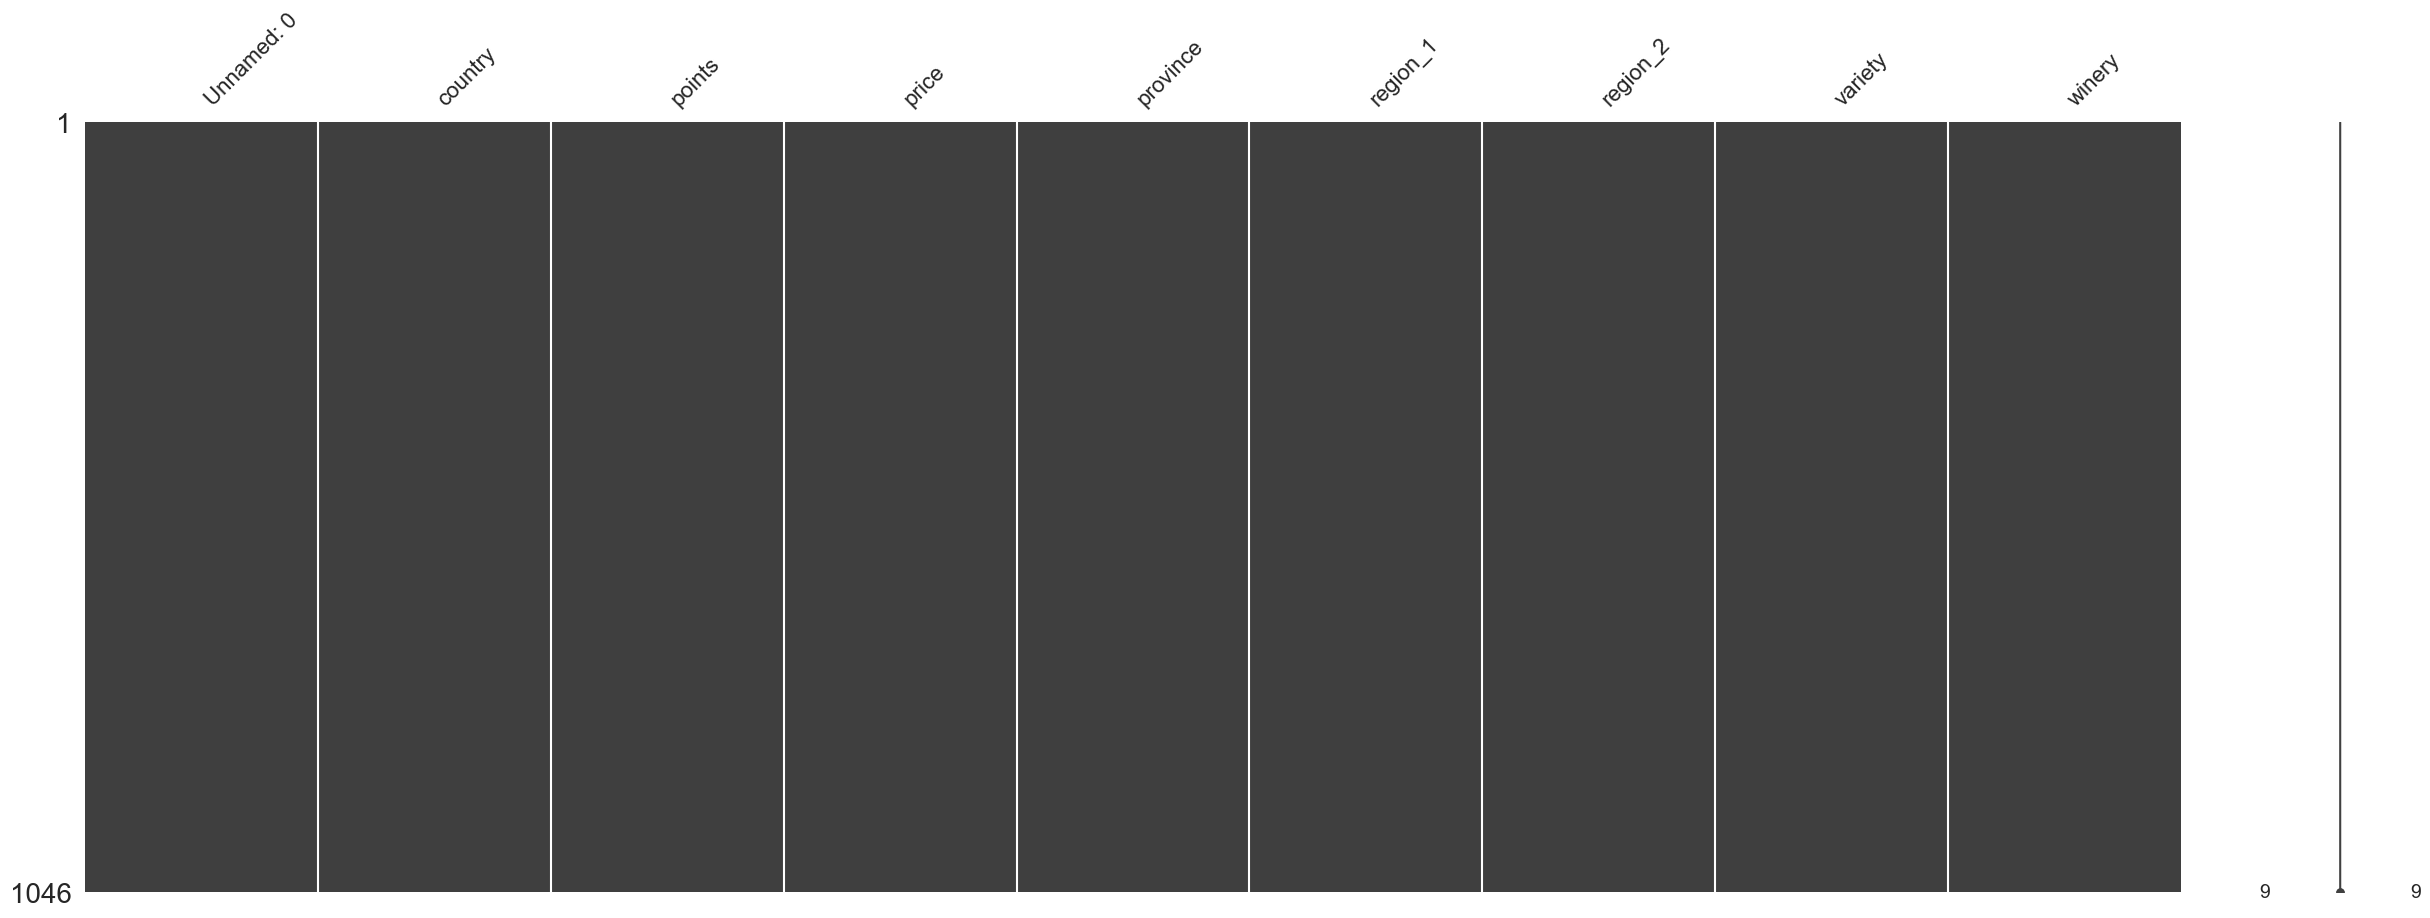

In [30]:
missingno.matrix(wine_df, figsize = (30,10))

In [31]:
wine_df.dtypes

Unnamed: 0      int64
country        object
points          int64
price         float64
province       object
region_1       object
region_2       object
variety        object
winery         object
dtype: object

Text(0, 0.5, 'Country')

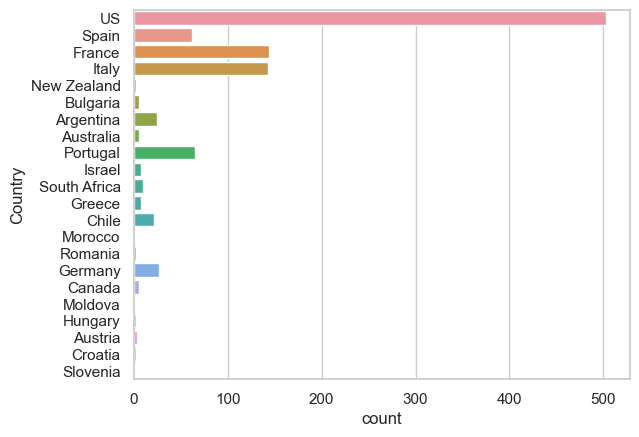

In [32]:
sns.countplot(y='country',data=wine_df)
plt.ylabel('Country') 

US, Italy and France have the most wines in the dataset

Text(0.5, 0, 'Points')

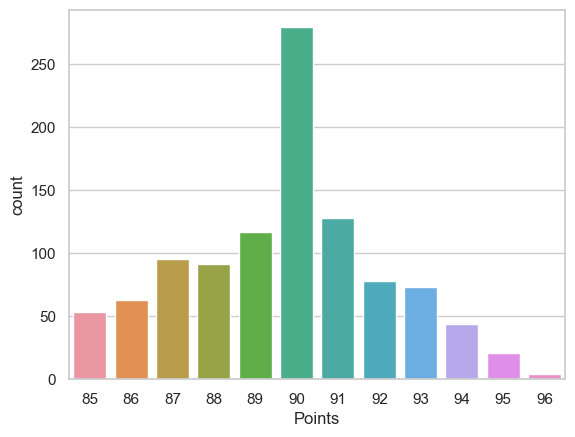

In [33]:
sns.countplot(x=wine_df['points'])
plt.xlabel('Points')

The most frequent score in the dataset is 90

<AxesSubplot: xlabel='price', ylabel='Count'>

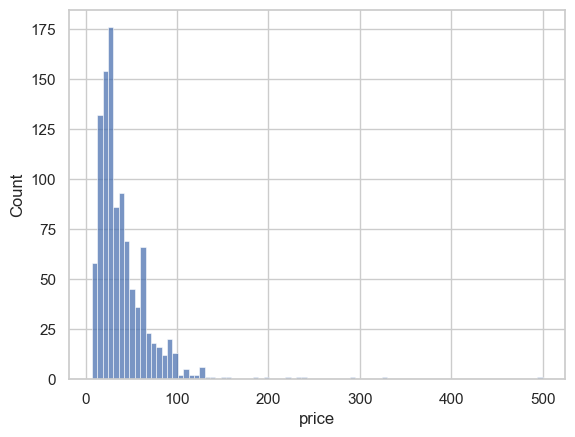

In [34]:
sns.histplot(x=wine_df['price'])


The most frequent price is approximately 30

<AxesSubplot: xlabel='points', ylabel='price'>

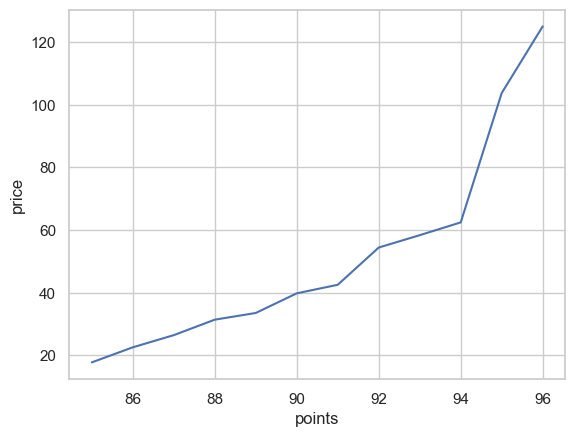

In [35]:
points=wine_df.groupby('points').mean()
sns.lineplot(y='price',x=points.index,data=points)

The score of the wine reflects the price in a linear correlation except for the wines with the highest points where the price is comparitively more expensive

<AxesSubplot: xlabel='points_scaled', ylabel='country'>

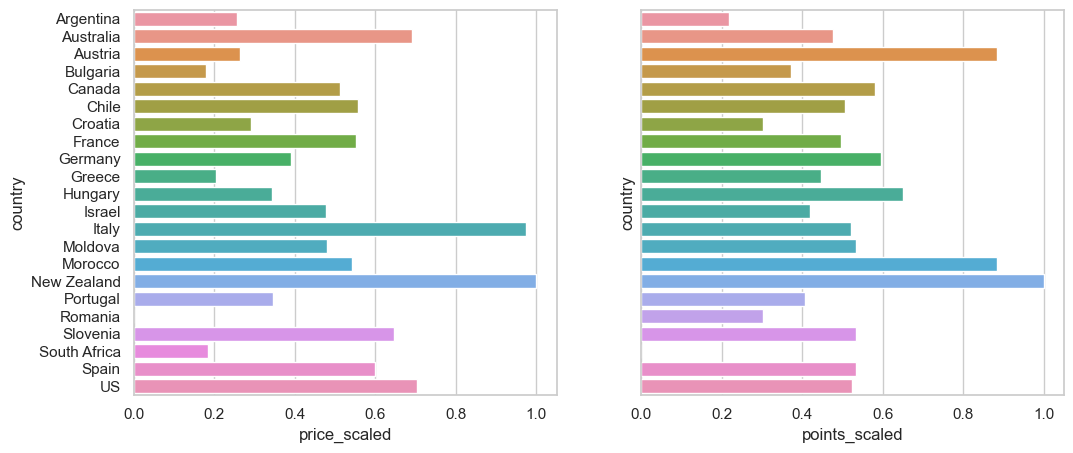

In [36]:
country=wine_df.groupby('country').mean()
fig, ax=plt.subplots(1,2,sharey=True,figsize=(12,5))
country['price_scaled']=minmax_scaling(country, 'price', min_val=0, max_val=1)
country['points_scaled']=minmax_scaling(country, 'points', min_val=0, max_val=1)

sns.barplot(x='price_scaled',y=country.index,data=country,ax=ax[0])
sns.barplot(x='points_scaled',y=country.index,data=country,ax=ax[1])


The countries with the most expensive wines are New Zealand, Italy, and US. The highest rated countries are New Zealand, Morocco, and Austria. Due to the low count of wines some countries, such as New Zealand compared to others such as US, the results is not likely to be accuarate.

<AxesSubplot: xlabel='price', ylabel='Count'>

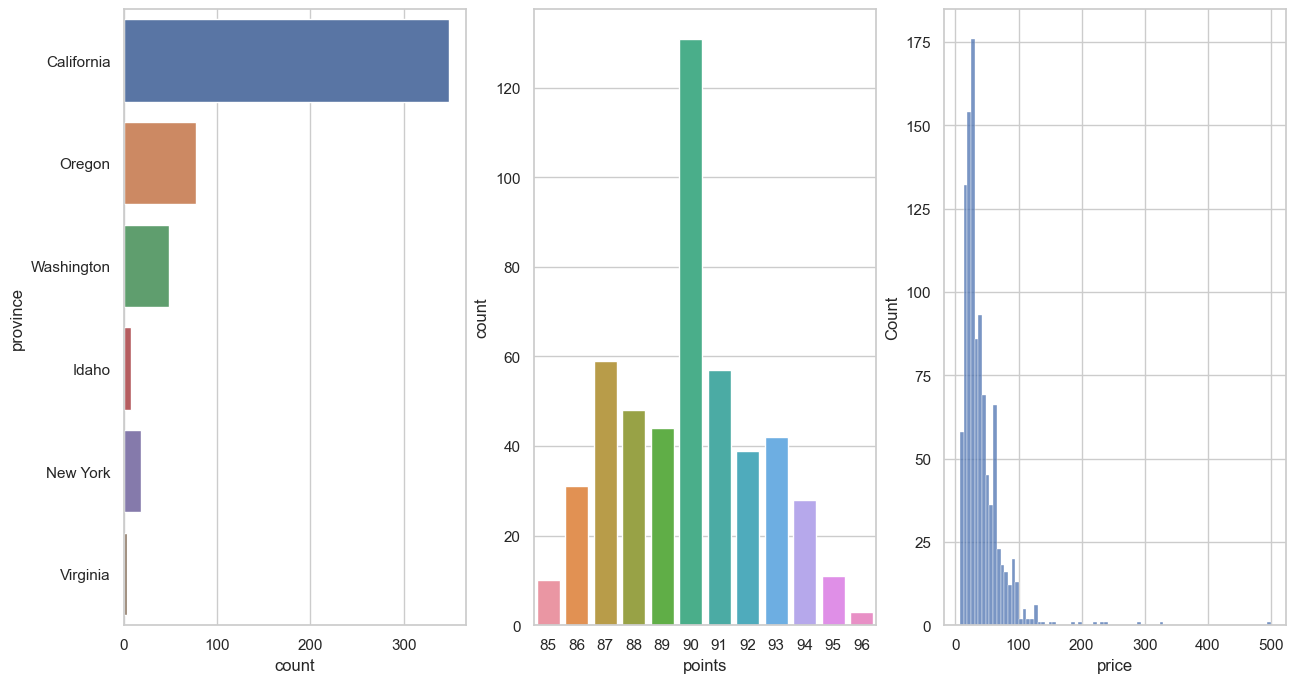

In [37]:
us_wines=wine_df.loc[wine_df["country"] == "US"]
fig, ax=plt.subplots(1,3,figsize=(15,8))

sns.countplot(y='province',data=us_wines,ax=ax[0])
sns.countplot(x=us_wines['points'],ax=ax[1])
sns.histplot(x=wine_df['price'],ax=ax[2])


California is the largest producer of wines in the US. The point and price distribution is similar to the global distribution for points and price.

<AxesSubplot: xlabel='price', ylabel='Count'>

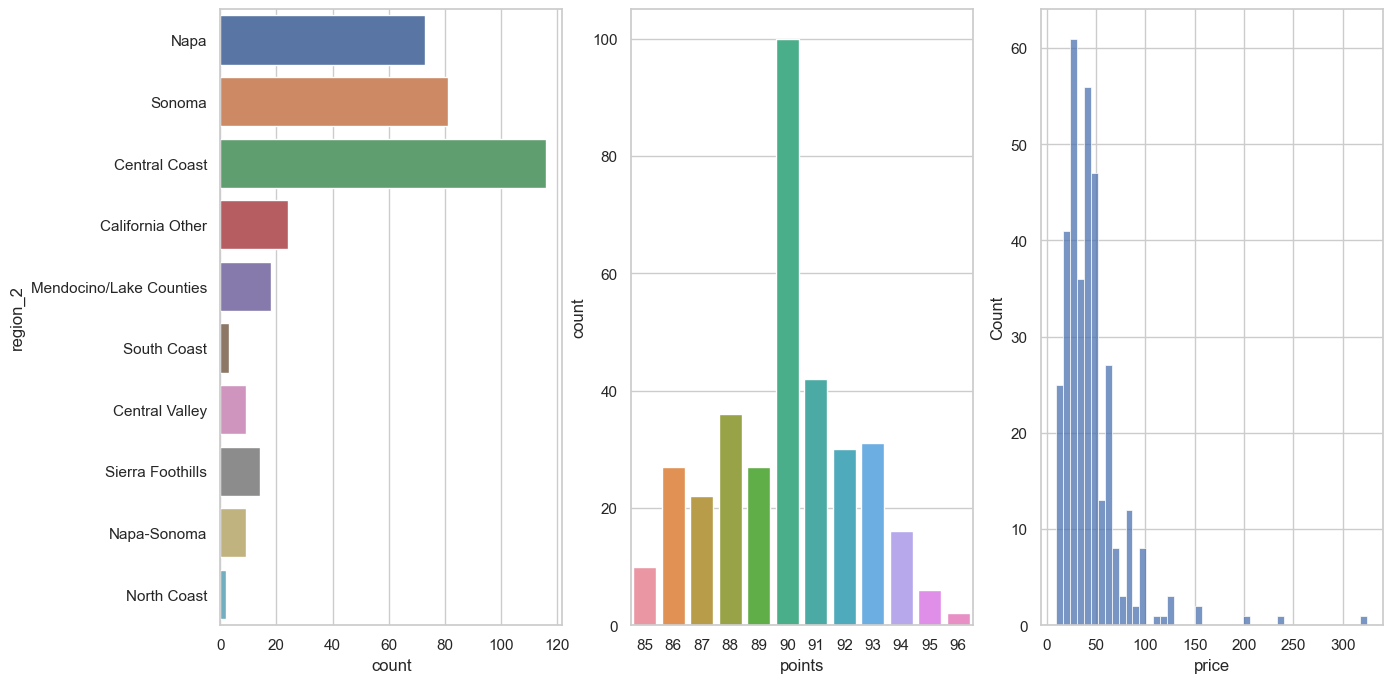

In [38]:
cali_wines=us_wines.loc[us_wines["province"] == "California"]
fig, ax=plt.subplots(1,3,figsize=(15,8))

sns.countplot(y='region_2',data=cali_wines,ax=ax[0])
sns.countplot(x=cali_wines['points'],ax=ax[1])
sns.histplot(x=cali_wines['price'],ax=ax[2])


Central coast is the largest producer of wines in California. The point and price distribution is similar to the US and global distribution for points and price.

Text(0.5, 0, 'Points')

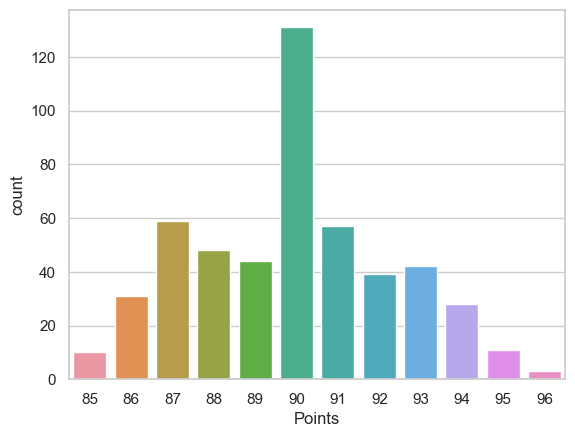

In [39]:
sns.countplot(x=us_wines['points'])
plt.xlabel('Points')

In [40]:
filtered_wine_df = wine_df.loc[
    (wine_df["variety"] == "Cabernet Sauvignon") | 
    (wine_df["variety"] == "Pinot Noir") | 
    (wine_df["variety"] == "Chardonnay")]
filtered_wine_df

,Unnamed: 0,country,points,price,province,region_1,region_2,variety,winery
0,0,US,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
3,3,US,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergstr√∂m
9,9,US,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,11,US,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
...,...,...,...,...,...,...,...,...,...
1081,1081,US,87,38.0,California,Santa Ynez Valley,Central Coast,Cabernet Sauvignon,Sevtap
1082,1082,US,87,14.0,New York,Finger Lakes,Finger Lakes,Chardonnay,Sheldrake Point
1085,1085,US,87,40.0,New York,Long Island,Long Island,Cabernet Sauvignon,W√∂lffer
1089,1089,US,87,25.0,New York,Finger Lakes,Finger Lakes,Cabernet Sauvignon,Chateau Lafayette Reneau


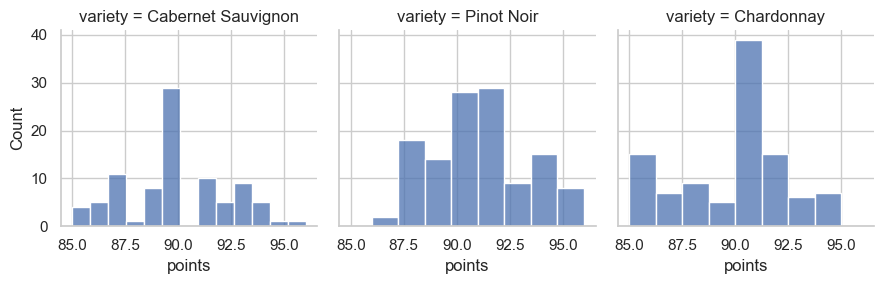

In [41]:
sns.FacetGrid(data=filtered_wine_df,col='variety',margin_titles=True).map(sns.histplot, 'points')

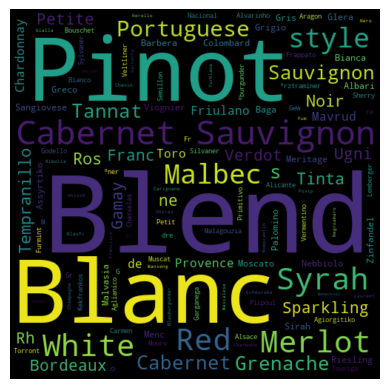

In [42]:
variety_list=list(wine_df['variety'].unique())
variety_str=','.join(variety_list)
wordcloud=WordCloud(width=500,height=500,margin=10).generate(variety_str)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)


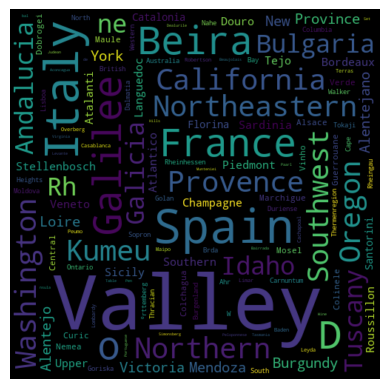

In [43]:
province_list=list(wine_df['province'].unique())
province_str=', '.join(province_list)
wordcloud=WordCloud(width=500,height=500,margin=10).generate(province_str)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
